# Atividade Qiskit 2
* *Daniel Guimarães* - 1910462
* *Iury Saboia* - 1620675

N5 = 4, N6 = 6 e N7 = 2,

## Questão 1.1
### Encontrando o vetor |0'⟩ e |1'⟩

```
|0' não-normalizado⟩ = 3 |0⟩ + 7 e^(10iπ⁄11) |1⟩
norma = √(α^2+β^2)= √58
|0'⟩ = (3/√58) |0⟩ + (7/√58)e^(10iπ⁄11) |1⟩
|1'⟩ = (7/√58)e^(-10iπ⁄11) |0⟩ - (3/√58) |1⟩
```

### Achando as rotações
Para poder medir na base {|0'⟩,|1'⟩}, é necessário encontrar os ângulos para a matriz de rotação

```
|0'⟩ = α |0⟩ + β e^ϕi |1⟩ = cos(θ/2) |0⟩ + sin(θ/2) e^ϕi |1⟩
θ = 2 * acos(3/√58) = 0.7422π
ϕ = 10π/11
```

Porém, esses são os ângulos para ir de |0⟩ para |0'⟩. Logo, as matrizes de rotação para ir de
|0'⟩ para |0⟩, é necessário fazer o *dagger* dessas matrizes, que nesse caso é a mesma matriz com os ângulos negativos.

In [7]:
from qiskit import QuantumCircuit, execute, Aer
from math import acos, sqrt, pi

estado_entrada = [1, 0]     # qibit |0⟩ para exemplo
phi = 10 * pi / 11
theta = 2 * acos(3/sqrt(59))
qc = QuantumCircuit(1, 1)
qc.initialize(estado_entrada)
# fazendo as transformações dagger
qc.rz(-phi, 0)                # Rz(-ϕ)
qc.ry(-theta, 0)     # Ry(-θ)
qc.measure(0, 0)
qc.draw()

┌─────────────────┐┌─────────────┐┌─────────────┐┌─┐
q_0: ┤ Initialize(1,0) ├┤ Rz(-10π/11) ├┤ Ry(-2.3391) ├┤M├
     └─────────────────┘└─────────────┘└─────────────┘└╥┘
c: 1/══════════════════════════════════════════════════╩═
                                                       0

## Questão 1.2

In [28]:
qc = QuantumCircuit(2, 2)
qc.initialize([1, 0], 0)
qc.initialize([0, 1], 1)
qc.rz(-phi, 0)
qc.rz(-phi, 1)
qc.ry(-theta, 0)
qc.ry(-theta, 1)
qc.measure(0, 0)
qc.measure(1, 1)
qc.draw()

┌─────────────────┐┌─────────────┐┌─────────────┐┌─┐   
q_0: ┤ Initialize(1,0) ├┤ Rz(-10π/11) ├┤ Ry(-2.3391) ├┤M├───
     ├─────────────────┤├─────────────┤├─────────────┤└╥┘┌─┐
q_1: ┤ Initialize(0,1) ├┤ Rz(-10π/11) ├┤ Ry(-2.3391) ├─╫─┤M├
     └─────────────────┘└─────────────┘└─────────────┘ ║ └╥┘
c: 2/══════════════════════════════════════════════════╩══╩═
                                                       0  1

Qibit |0⟩ mediu 0 em 0.153 das vezes. Teoria: 0.155
Qibit |1⟩ mediu 0 em 0.848 das vezes. Teoria: 0.845


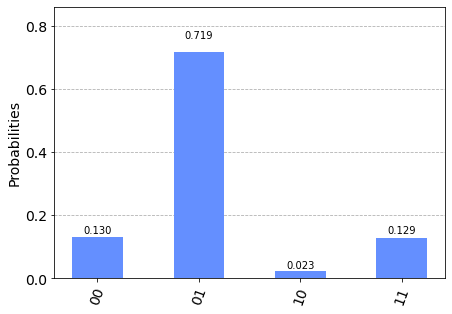

In [29]:
backend = Aer.get_backend('qasm_simulator')
res = execute(qc, backend, shots=10000).result()
counts = res.get_counts()

print("Qibit |0⟩ mediu 0 em %0.3f das vezes. Teoria: %0.3f" %
      ((counts['10'] + counts['00'])/10000, 9/58))
print("Qibit |1⟩ mediu 0 em %0.3f das vezes. Teoria: %0.3f" %
      ((counts['00'] + counts['01'])/10000, 49/58))

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

O valor teórico de |0⟩ medir 0 é ```|⟨0'|0⟩|^2 = |(3/√58)^2 ⟨0|0⟩|^2 = |3/√58|^2 = 9/58```

O valor teórico de |1⟩ medir 0 é ```|⟨0'|1⟩|^2 = |(7/√58)^2 ⟨1|1⟩|^2 = |7/√58|^2 = 49/58```

## Questão 2.1

In [54]:
qc = QuantumCircuit(2, 2)
qc.h(0)                     # |0⟩ -> |+⟩
qc.cnot(0, 1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════

## Questão 2.2i

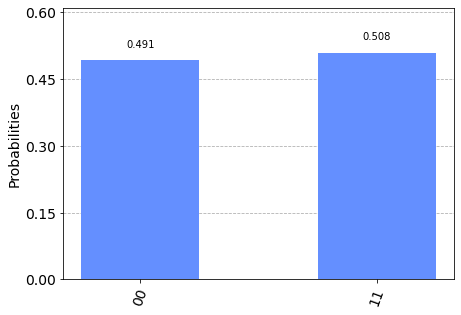

In [58]:
qc_i = qc.copy()        #qc_i é o circuito da 2.2(i)
qc_i.measure(0, 0)
qc_i.measure(1, 1)
counts = execute(qc_i, backend, shots=10000).result().get_counts()
plot_histogram(counts)

O valor teórico de |ϕ+⟩ medir |00⟩ é
```| ⟨00|ϕ+⟩ |^2 = | ⟨00|00⟩/√2 |^2 = 0.5```

## Questão 2.2ii

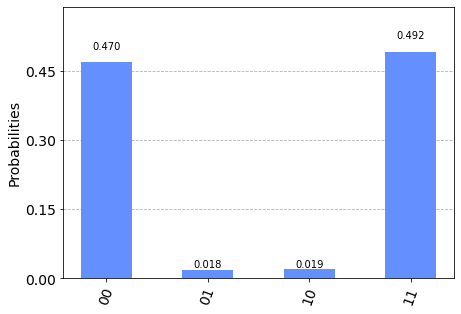

In [57]:
qc_ii = qc.copy()
qc_ii.rz(-phi, 0)
qc_ii.rz(-phi, 1)
qc_ii.ry(-theta, 0)
qc_ii.ry(-theta, 1)
qc_ii.measure(0, 0)
qc_ii.measure(1, 1)
counts = execute(qc_ii, backend, shots=10000).result().get_counts()
plot_histogram(counts)

O valor teórico de |ϕ+⟩ medir |0'0'⟩ é
```
| ⟨0'0'|ϕ+⟩ |^2 = | (⟨'0'0|00⟩ + ⟨'0'0|11⟩)/√2 |^2 =
| 9/58√2 + 49e^(-20iπ⁄11)/58√2 |^2 = 0.479
```
O valor teórico de |ϕ+⟩ medir |1'0'⟩ é
```
| ⟨1'0'|ϕ+⟩ |^2 = | (⟨'1'0|00⟩ + ⟨'1'0|11⟩)/√2 |^2 =
|1/√2 * ( ⟨1'|0⟩⟨0'|0⟩ + ⟨1'|1⟩^2 ) | ^2 =
|1/58√2 * (21e^(-10iπ⁄11) + 9) |^2 = 0.0236
```

## Questão 2.3

In [65]:
qc3 = QuantumCircuit(2, 2)
qc3.x(0)                     # |0⟩|0⟩ -> |1⟩|0⟩
qc3.x(1)                     # |1⟩|0⟩ -> |1⟩|1⟩
qc3.h(0)                     # |1⟩|1⟩ -> |-⟩|1⟩
qc3.cnot(0, 1)               # |-⟩|1⟩ -> |ψ⟩
qc3.draw()

┌───┐┌───┐     
q_0: ┤ X ├┤ H ├──■──
     ├───┤└───┘┌─┴─┐
q_1: ┤ X ├─────┤ X ├
     └───┘     └───┘
c: 2/═══════════════

## Questão 2.4i

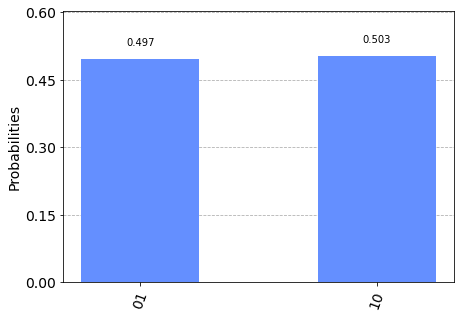

In [62]:
qc_i = qc3.copy()
qc_i.measure(0, 0)
qc_i.measure(1, 1)
counts = execute(qc_i, backend, shots=10000).result().get_counts()
plot_histogram(counts)

O valor teórico de |ψ-⟩ medir |10⟩ é
```| ⟨00|ψ-⟩ |^2 = | ⟨10|01⟩/√2 |^2 = 0.5```

## Questão 2.4ii

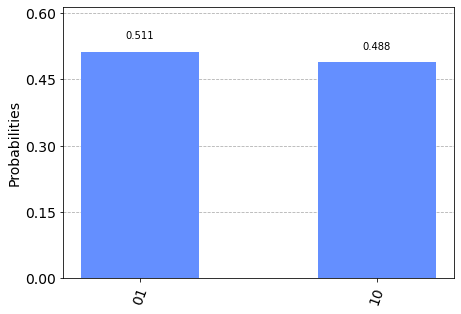

In [63]:
qc_ii = qc3.copy()
qc_ii.rz(-phi, 0)
qc_ii.rz(-phi, 1)
qc_ii.ry(-theta, 0)
qc_ii.ry(-theta, 1)
qc_ii.measure(0, 0)
qc_ii.measure(1, 1)
counts = execute(qc_ii, backend, shots=10000).result().get_counts()
plot_histogram(counts)

O valor teórico de |ψ-⟩ medir |1'0'⟩ é
```
| ⟨1'0'|ψ-⟩ |^2 = | (⟨'1'0|01⟩ - ⟨'1'0|10⟩)/√2 |^2 =
|1/√2 * ( ⟨0'|0⟩⟨1'|1⟩ - ⟨0'|1⟩⟨1'|0⟩ ) | ^2 =
|1/58√2 * (-9 - 49) |^2 = 0.5
```

## Questão 2.5

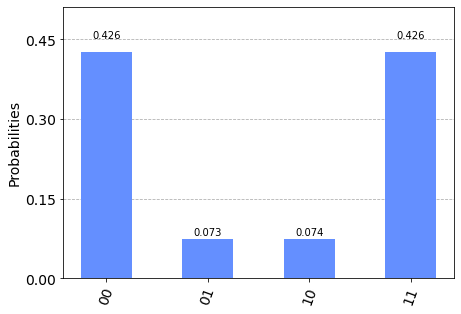

In [67]:
qc4 = qc3.copy()
qc4.rz(-phi, 1)
qc4.ry(-theta, 1)
qc4.measure(0, 0)
qc4.measure(1, 1)
counts = execute(qc4, backend, shots=10000).result().get_counts()
plot_histogram(counts)

O valor teórico de |ψ-⟩ medir |00'⟩ é
```
| ⟨00'|ψ-⟩ |^2 = | (⟨00'|01⟩ - ⟨00'|10⟩)/√2 |^2 =
|1/√2 * ( ⟨0'|0⟩⟨0|1⟩ + ⟨0'|1⟩⟨0|0⟩ ) | ^2 =
|1/√2 * (9e^(10iπ⁄11)/√58 |^2 = 0.422
```
O valor teórico de |ψ-⟩ medir |10'⟩ é
```
| ⟨10'|ψ-⟩ |^2 = | (⟨10'|01⟩ - ⟨10'|10⟩)/√2 |^2 =
|1/√2 * ( ⟨0'|0⟩⟨1|1⟩ + ⟨0'|1⟩⟨1|0⟩ ) | ^2 =
|1/√2 * (3/√58) |^2 = 0.077
```